In [1]:
import h5py
from ipywidgets import interact
import xrayutilities_id01_functions as id01
import xrayutilities as xu
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
d = '../h5_files/'
!ls {d} | grep h5

20161115_E16019.h5
20161115_E16020.h5
20161115_E16088.h5
20161115_E16095.h5
20161117_E16014.h5
20161117_E16018.h5
20161117_E16095.h5


In [31]:
fname = '20161115_E16019.h5'
f = h5py.File(d+fname)
f.keys()

[u'scan_0001',
 u'scan_0002',
 u'scan_0003',
 u'scan_0004',
 u'scan_0005',
 u'scan_0006',
 u'scan_0007',
 u'scan_0008',
 u'scan_0009',
 u'scan_0010']

The following reconstructs the data. The number of gridding points affects its resolution. 

['nix', 'H', 'K', 'L', 'Epoch', 'Seconds', 'bv1', 'opt1', 'opt2', 'bv2', 'att2', 'bv3', 'bv4', 'exp2', 'Srcur', 'roi1', 'roi2', 'roi3', 'roi4', 'roi5', 'mpx4ro1', 'mpx4ro2', 'mpx4inr', 'exp1', 'mpx4int']
[]


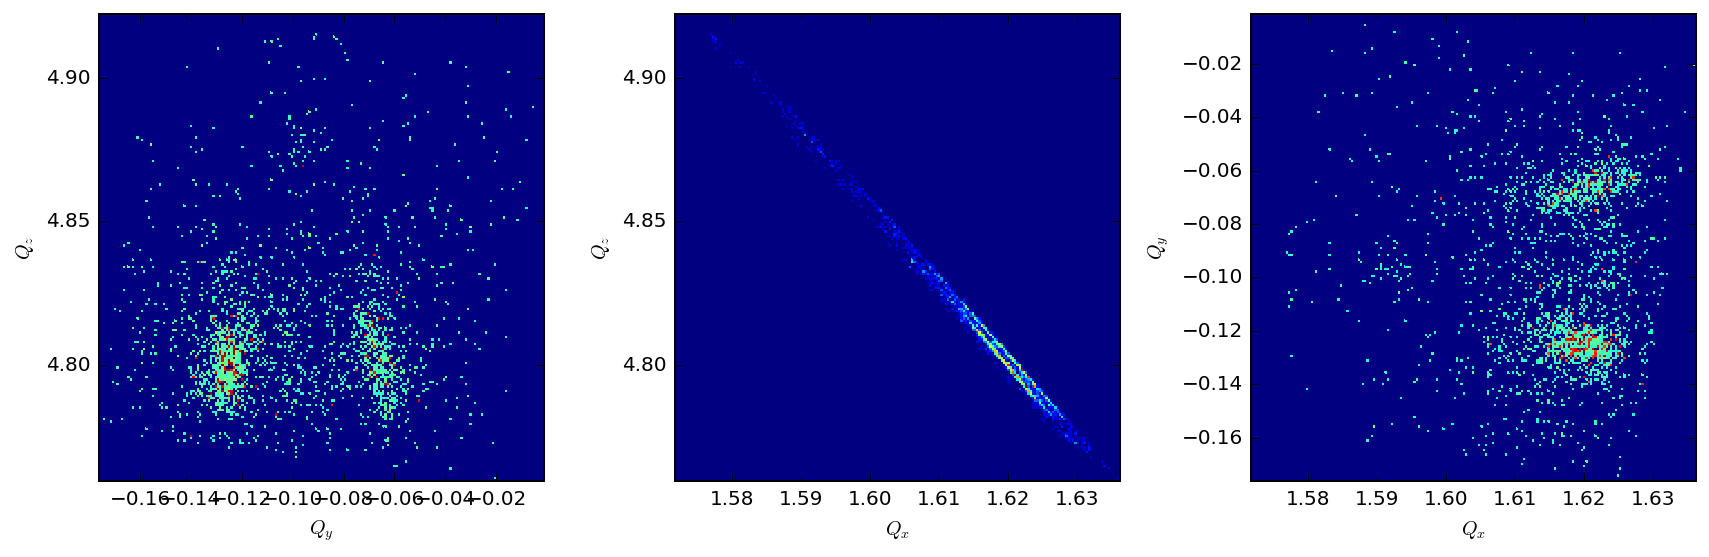

In [32]:
scan_no = 9
h5file = d + fname

nx, ny, nz = 200,200,200

qx, qy, qz, gint, gridder = id01.gridmap(h5file, scan_no, nx, ny, nz, angdelta=[0,45,0,0])

QX, QY, QZ = np.mgrid[qx.min():qx.max():1j*nx,
                     qy.min():qy.max():1j*ny,
                     qz.min():qz.max():1j*nz]

INT = xu.maplog(gint, 4.5, 0)

## Plotting

fig = plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.pcolormesh(QY[0,:,:],QZ[0,:,:],INT.sum(axis=0))
plt.axis([QY[0,:,:].min(),QY[0,:,:].max(),QZ[0,:,:].min(),QZ[0,:,:].max()])
plt.xlabel(r'$Q_y$')
plt.ylabel(r'$Q_z$')

plt.subplot(1,3,2)
plt.pcolormesh(QX[:,0,:],QZ[0,:,:],INT.sum(axis=1))
plt.axis([QX[:,0,:].min(),QX[:,0,:].max(),QZ[0,:,:].min(),QZ[0,:,:].max()])
plt.xlabel(r'$Q_x$')
plt.ylabel(r'$Q_z$')

plt.subplot(1,3,3)
plt.pcolormesh(QX[:,0,:],QY[:,:,0],INT.sum(axis=2))
plt.axis([QX[:,0,:].min(),QX[:,0,:].max(),QY[:,:,0].min(),QY[:,:,0].max()]);
plt.xlabel(r'$Q_x$')
plt.ylabel(r'$Q_y$')

fig.tight_layout()

# plt.savefig('img/e16018_s{0}png'.format(scan_no),dpi=350)

### Visualise with Mayavi (opens another python instance)

In [5]:
%%writefile plt_3d.py

import xrayutilities_id01_functions as id01
import numpy as np
import xrayutilities as xu
from mayavi import mlab

d = '../h5_files/'
fname = '20161115_E16019.h5'

scan_no = 3
h5file = d + fname

# Reconstruction

nx, ny, nz = 100,100,100
qx, qy, qz, gint, gridder = id01.gridmap(h5file, scan_no, nx, ny, nz, angdelta=[0,45,0,0])
QX, QY, QZ = np.mgrid[qx.min():qx.max():1j*nx,
                     qy.min():qy.max():1j*ny,
                     qz.min():qz.max():1j*nz]
INT = xu.maplog(gint, 4.5, 0)

# Plotting

mlab.figure()
mlab.contour3d(QX, QY, QZ, INT, contours=10, opacity=.2)
# mlab.colorbar() makes it crash!
mlab.axes(nb_labels=5, xlabel='Qx', ylabel='Qy', zlabel='Qz')
mlab.title('SCAN:%i'%scan_no, size=0.5, height=0.9)
mlab.show()


Overwriting plt_3d.py


In [6]:
%%bash
zsh 
source $HOME/.zshrc
activate_canopy 
python plt_3d.py

]2;source '/Users/ezatterin/Library/Enthought/Canopy_64bit/User/bin/activate']1;]2;python plt_3d.py]1;['del', 'eta', 'H', 'K', 'L', 'Epoch', 'Seconds', 'bv1', 'opt1', 'opt2', 'bv2', 'att2', 'bv3', 'bv4', 'exp2', 'Srcur', 'roi1', 'roi2', 'roi3', 'roi4', 'roi5', 'mpx4ro1', 'mpx4ro2', 'mpx4inr', 'exp1', 'mpx4int']
None
None
['eta', 'del']


vtkCocoaRenderWindow (0x12b192800): VTK is designed to work with OpenGL version 3.2 but it appears it has been given a context that does not support 3.2. VTK will run in a compatibility mode designed to work with OpenGL 2.1 but some features may not work.



In [90]:
scan = f['scan_0001/data/image_data']
scan.shape

(101, 516, 516)

Raw data:

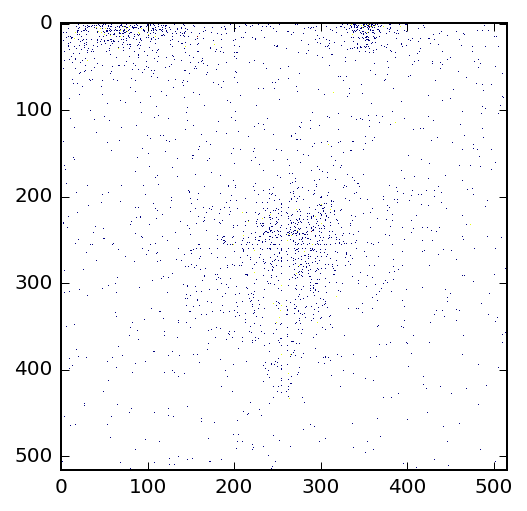

In [91]:
@interact(i=(0,scan.shape[0]-1))
def plt_scan(i):
    plt.imshow(np.log(scan[i]),interpolation='none')